# Лабораторная работа №4

**Цель работы**: изучение алгоритмов и методов кластеризации на практике.

**Вариант 12** (2)

Первым делом сгенерируем датасет, содержащий два параметра: `x` и `y`  

In [112]:
import numpy as np
import pandas as pd
def make_data(n, seed):
	np.random.seed(seed)
	shift_matrix = np.array([[3,3],
							 [6,9],
							 [9,3]])

	data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
	data = np.swapaxes(data, 1, 2)
	data = data.reshape((-1, 2))
	data *= np.array([[20, 0.5]])
	df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
	columns=['x', 'y'])
	df = df.sample(frac=1.0)
	return df

Применим написанную функцию, сгенерировав датасет из трёх кластеров, по 50 элементов каждый

In [113]:
df = make_data(50, 0)
df.reset_index(drop=True, inplace=True)
df

,x,y
0,42.918085,1.525973
1,193.105275,1.340336
2,68.877265,1.588713
3,187.583035,1.544211
4,157.351179,4.250984
...,...,...
145,104.601679,4.323003
146,75.220755,1.093427
147,161.111075,0.531860
148,132.700629,3.915953


Выполняем стандартизацию данных

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # создание объекта класса Scaler
df_scaled = scaler.fit_transform(df) # преобразование данных с помощью transform

Обучение модели для кластеризации методом KMeans

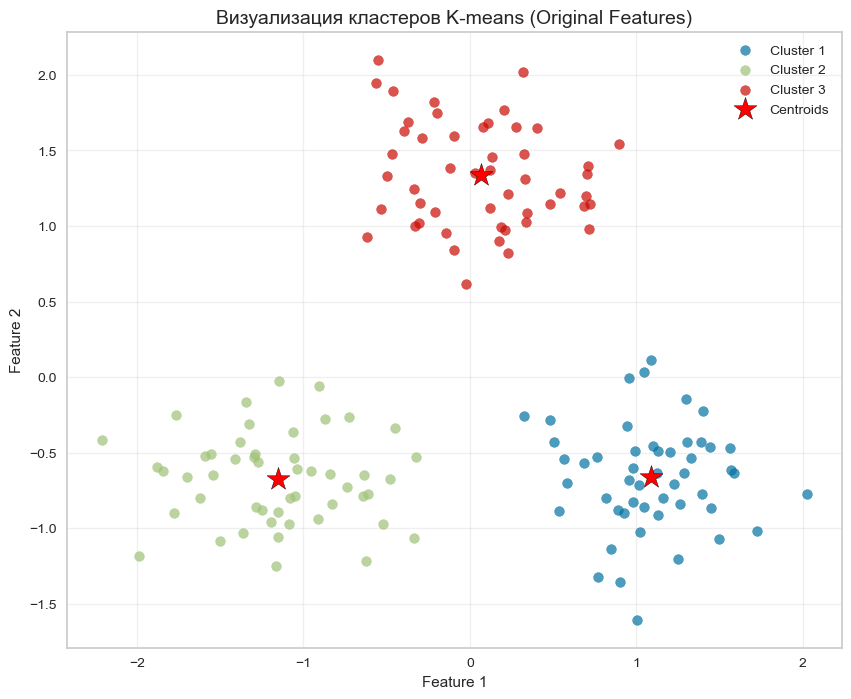

Коэффициент силуэта: 0.6904


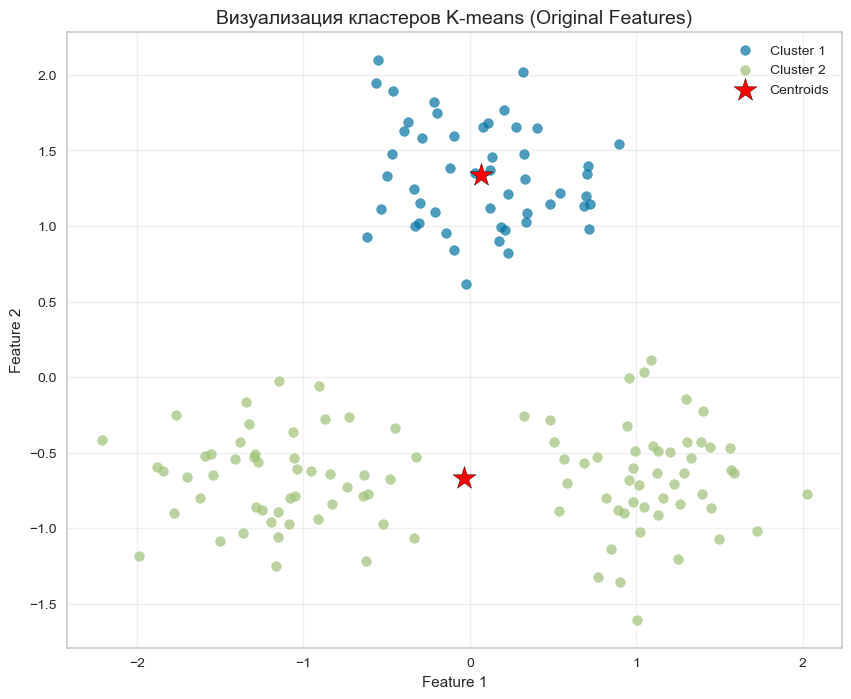

Коэффициент силуэта: 0.4809


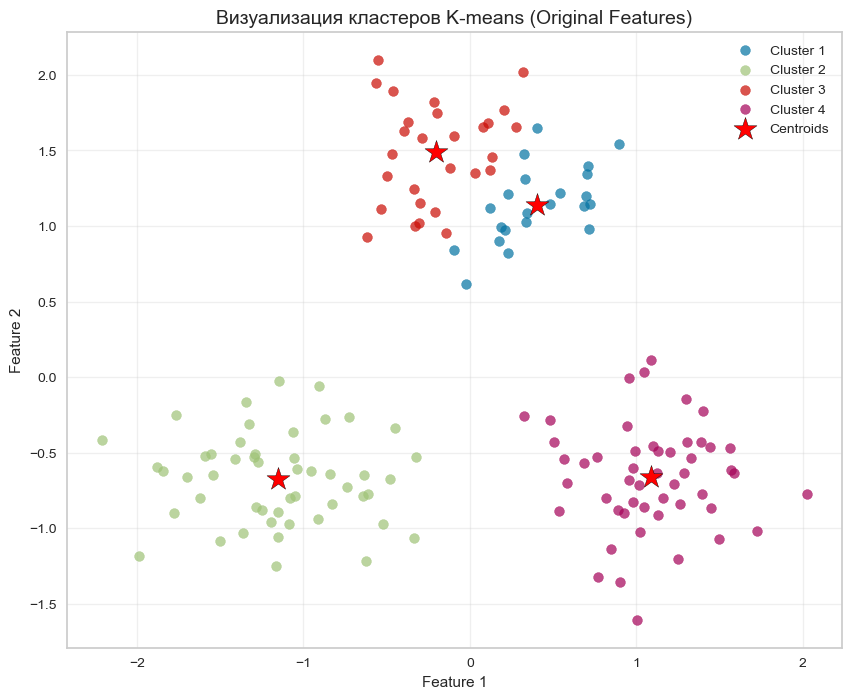

Коэффициент силуэта: 0.5721


array([1, 3, 1, 3, 0, 0, 1, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 0, 1, 1, 0,
       3, 3, 2, 3, 1, 0, 3, 3, 1, 3, 1, 2, 1, 3, 3, 3, 1, 2, 3, 3, 2, 1,
       2, 1, 0, 1, 1, 2, 3, 1, 2, 3, 1, 2, 2, 2, 3, 1, 3, 2, 2, 1, 1, 0,
       1, 1, 1, 3, 0, 1, 2, 1, 1, 2, 3, 1, 0, 0, 1, 1, 0, 3, 2, 2, 3, 2,
       1, 0, 1, 0, 1, 3, 3, 2, 2, 2, 0, 3, 2, 2, 3, 3, 1, 1, 1, 3, 1, 0,
       3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 1, 0, 2, 3, 0, 3, 0, 3, 3, 3, 2, 3,
       3, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 3, 0, 2, 1, 3, 0, 3], dtype=int32)

In [115]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def clusterization(X, n_clusters):
    # Convert input to numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values
    elif not isinstance(X, np.ndarray):
        X = np.array(X)
    
    k_means = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = k_means.fit_predict(X)
    centroids = k_means.cluster_centers_

    plt.figure(figsize=(10, 8))
    
    # If data is already 2D, plot directly without PCA
    if X.shape[1] == 2:
        for i in range(n_clusters):
            plt.scatter(X[clusters == i, 0], X[clusters == i, 1], 
                        s=50, label=f'Cluster {i+1}', alpha=0.7)
        
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    marker='*', s=300, c='red', label='Centroids', edgecolors='black')
        
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Визуализация кластеров K-means (Original Features)', fontsize=14)
    
    else:
        # Use PCA for higher-dimensional data
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        
        for i in range(n_clusters):
            plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                        s=50, label=f'Cluster {i+1}', alpha=0.7)

        centroids_pca = pca.transform(centroids)
        plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
                    marker='*', s=300, c='red', label='Centroids', edgecolors='black')
        
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('Визуализация кластеров K-means (PCA Projection)', fontsize=14)

    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    silhouette = silhouette_score(X, clusters)
    print(f"Коэффициент силуэта: {silhouette:0.4f}")    

    return clusters

clusterization(df_scaled, 3)
clusterization(df_scaled, 2)
clusterization(df_scaled, 4)

---
**Выводы**

Количество кластеров, равное 3 можем считать оптимальным, так как при таком числе кластеров коэффициент силуэта наибольший, что говорит о высоком качестве кластеризации

Также определим оптимальное число кластеров методом локтя. Видим, что "перелом" графика происходит в точке 3. Значит отимальное количество кластров - 3.

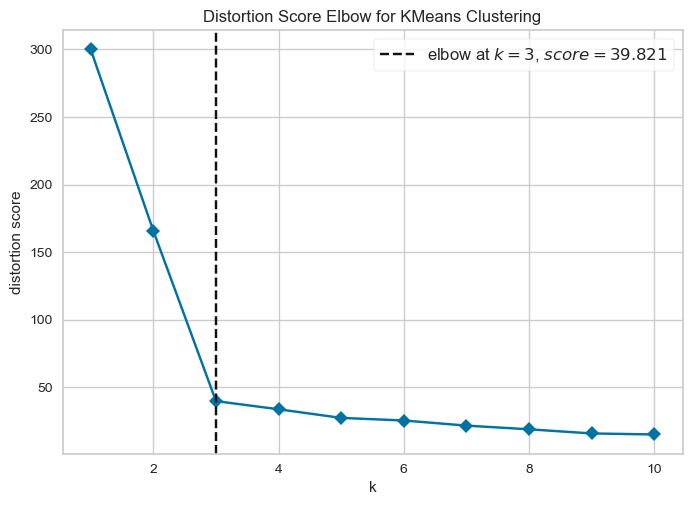

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11), timings=False)
visualizer.fit(df_scaled)
visualizer.show()

# Часть 2

Для выполнения второй части выбран вариант задания 2, что соответствует 12-му варианту в списке группы. Выполним импорт датасета, изучим типы данных.

In [117]:
df = pd.read_csv('employee_attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3048 non-null   int64  
 1   gender                    3048 non-null   object 
 2   department                3048 non-null   object 
 3   job_level                 3048 non-null   int64  
 4   marital_status            3048 non-null   object 
 5   monthly_income            3048 non-null   float64
 6   years_at_company          3048 non-null   int64  
 7   overtime                  3048 non-null   object 
 8   performance_rating        3048 non-null   int64  
 9   distance_from_home_km     3048 non-null   float64
 10  training_hours_last_year  3048 non-null   float64
 11  Attrition                 3048 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 285.9+ KB


Закодируем категориальные данные для правильного учёта их в алгоритме кластеризации

In [118]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for col in df.select_dtypes(include='object').columns:
	df[col] = oe.fit_transform(pd.DataFrame(df[col]))

Построим матрицу диаграмм рассеивания. Выделим красным работников, которые уволились, а синим - которые остались.  

<Figure size 2000x1600 with 0 Axes>

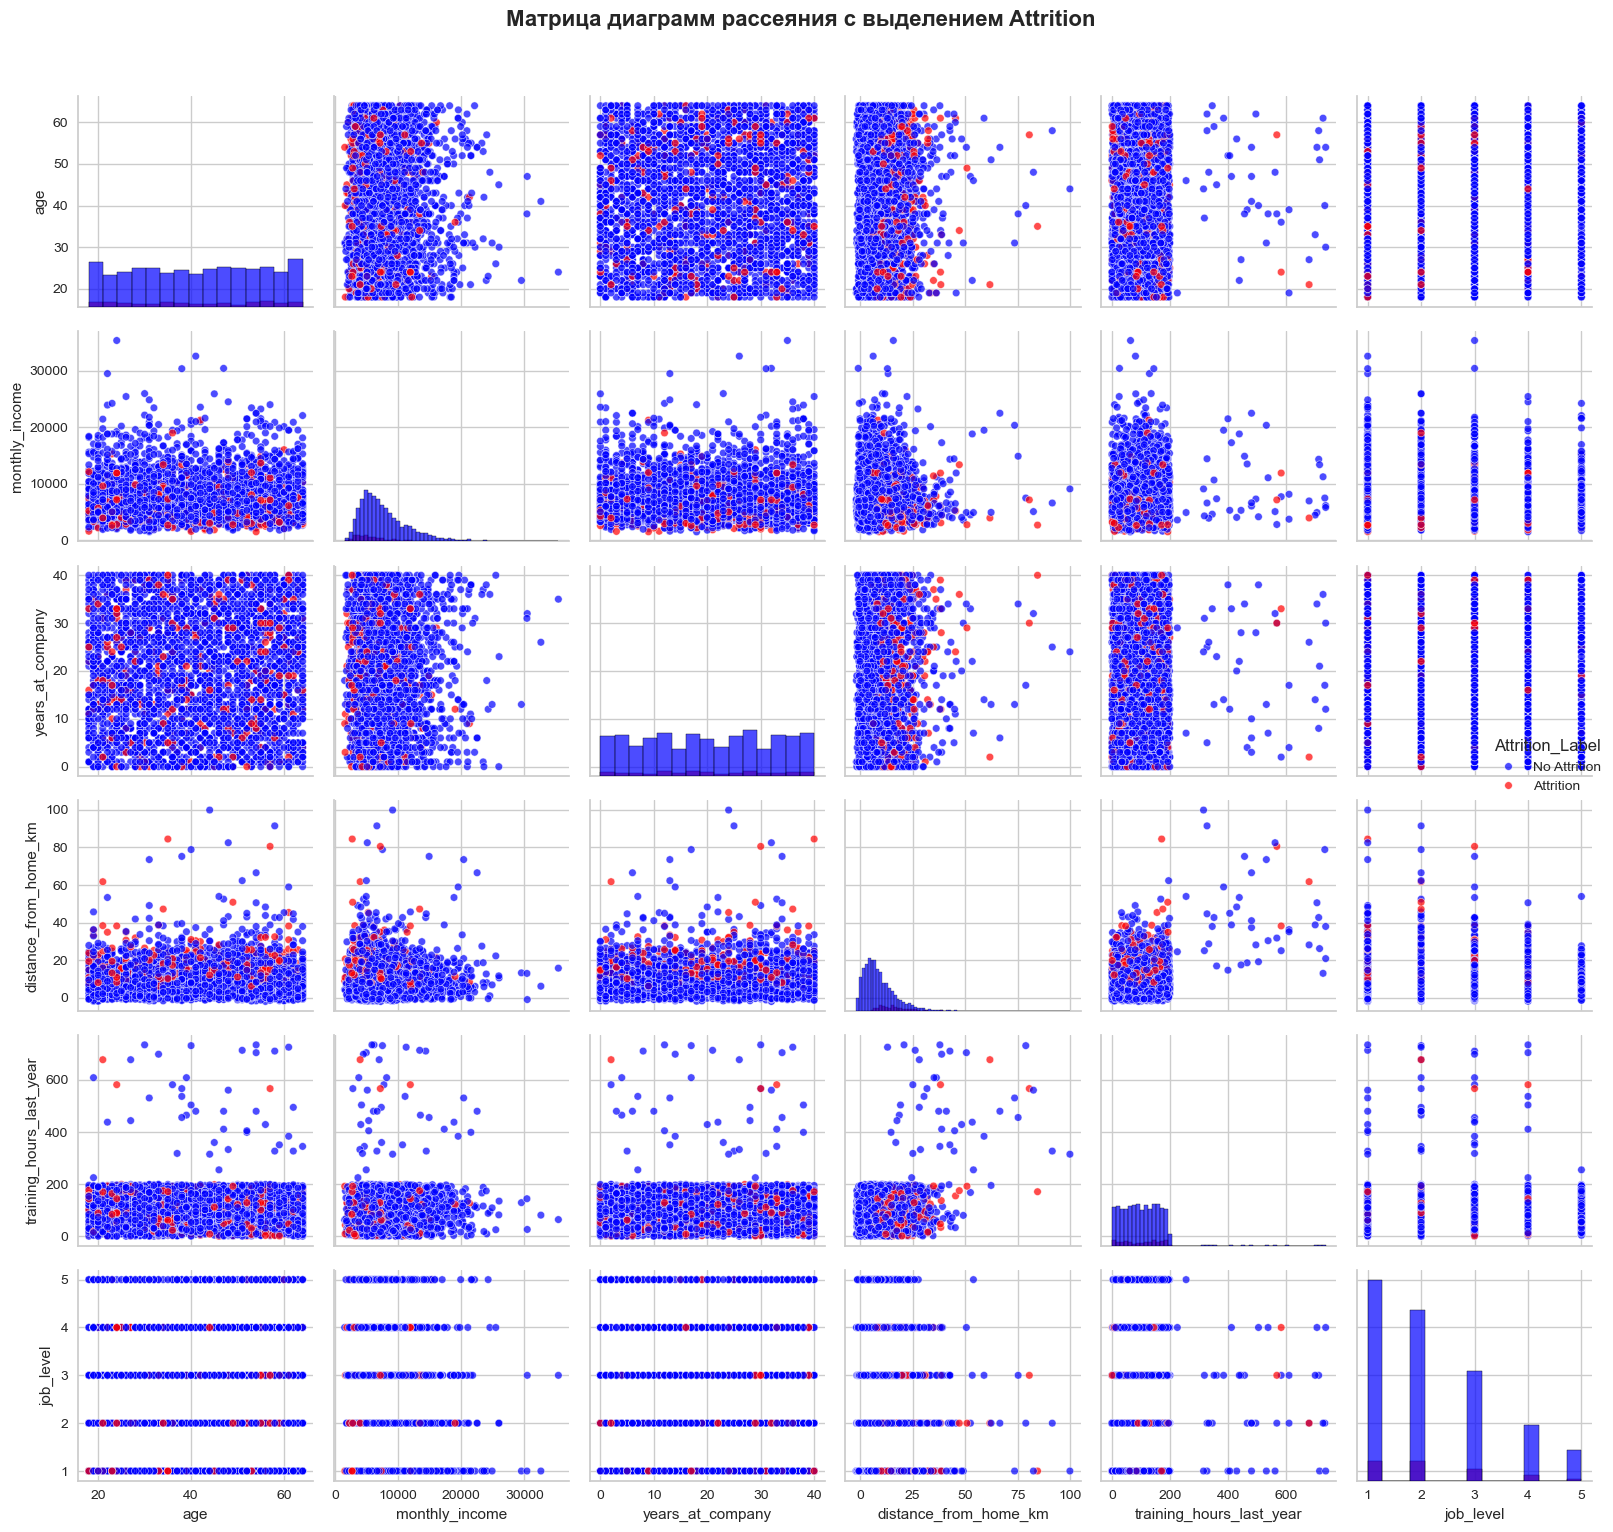

In [119]:
import seaborn as sns

df_viz = df.copy()

df_viz['Attrition_Label'] = df_viz['Attrition'].map({0: 'No Attrition', 1: 'Attrition'})

numerical_features = ['age', 'monthly_income', 'years_at_company', 
                     'distance_from_home_km', 'training_hours_last_year', 'job_level']

# Матрица диаграмм рассеяния
plt.figure(figsize=(20, 16))
sns.pairplot(df_viz[numerical_features + ['Attrition_Label']], 
             hue='Attrition_Label',
             palette={'No Attrition': 'blue', 'Attrition': 'red'},
             diag_kind='hist',
             plot_kws={'alpha': 0.7, 's': 30},
             diag_kws={'alpha': 0.7})
plt.suptitle('Матрица диаграмм рассеяния с выделением Attrition', 
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Масштабируем данные методом `StandardScaler`

In [120]:
df_with_clusters = df.copy()

y = df['Attrition']
X = df.drop('Attrition', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Определяем оптимальное количество кластеров по методу локтя

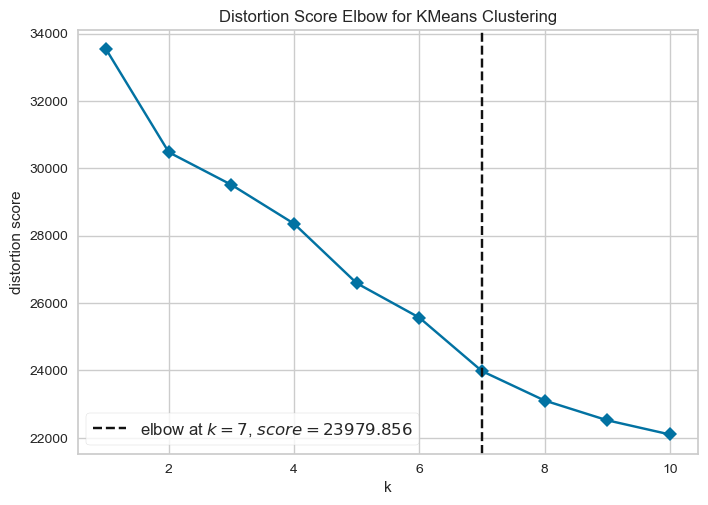

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [121]:

visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,11), timings=False)
visualizer.fit(X_scaled)
visualizer.show()

Оптимальное количество кластеров - 7. Используем это при выполнении кластеризации методом KMeans

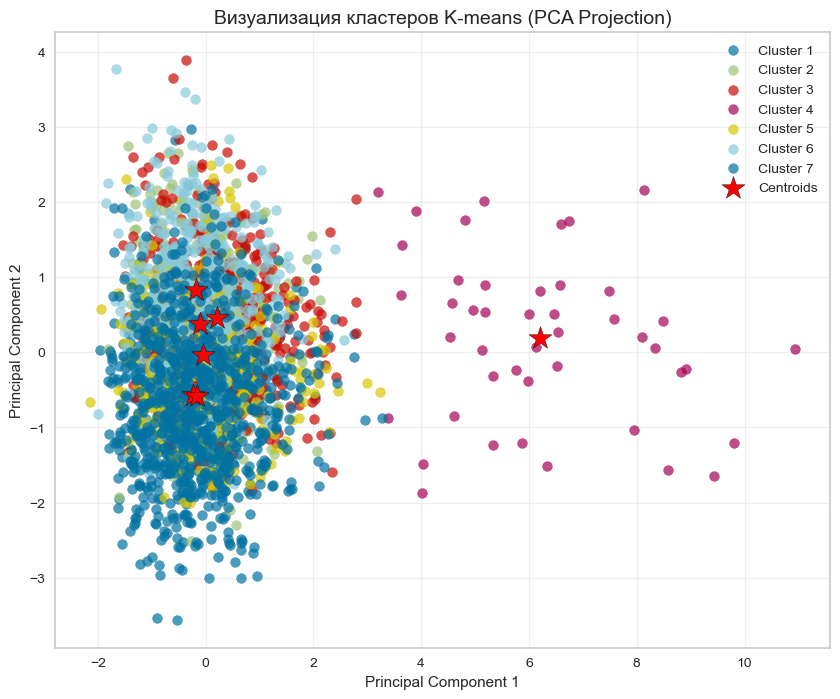

Коэффициент силуэта: 0.0785


In [122]:
clusters = clusterization(X=X_scaled, n_clusters=7)

Рассчитаем средние показатели для каждого кластера. Для категориальных данных определим моду.

In [123]:
df_with_clusters['Cluster'] = clusters

def calculate_cluster_statistics(df_with_clusters):
    # Группируем по кластерам и вычисляем средние
    cluster_stats = df_with_clusters.groupby('Cluster').agg({
        'age': 'mean',
        'monthly_income': 'mean',
        'years_at_company': 'mean',
        'job_level': 'mean',
        'distance_from_home_km': 'mean',
        'training_hours_last_year': 'mean',
        'performance_rating': 'mean',
        'gender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 0,
        'department': lambda x: x.mode()[0] if len(x.mode()) > 0 else 0,
        'marital_status': lambda x: x.mode()[0] if len(x.mode()) > 0 else 0,
        'overtime': lambda x: x.mode()[0] if len(x.mode()) > 0 else 0,
        'Attrition': 'mean'
    }).round(2)
    
    # Добавляем размер кластера
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    cluster_stats['Cluster_Size'] = cluster_sizes
    cluster_stats['Cluster_Size_Pct'] = (cluster_sizes / len(df_with_clusters) * 100).round(1)
    
    # Переименовываем столбцы для лучшей читаемости
    cluster_stats = cluster_stats.rename(columns={
        'age': 'Avg_Age',
        'monthly_income': 'Avg_Income',
        'years_at_company': 'Avg_Tenure',
        'job_level': 'Avg_Job_Level',
        'distance_from_home_km': 'Avg_Distance_Home',
        'training_hours_last_year': 'Avg_Training_Hours',
        'performance_rating': 'Avg_Performance',
        'gender': 'Mode_Gender',
        'department': 'Mode_Department',
        'marital_status': 'Mode_Marital_Status',
        'overtime': 'Mode_Overtime',
        'Attrition': 'Attrition_Rate'
    })
    
    return cluster_stats

# Вычисляем статистику
cluster_stats = calculate_cluster_statistics(df_with_clusters)
print("СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ:")
display(cluster_stats)

СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ:


,Avg_Age,Avg_Income,Avg_Tenure,Avg_Job_Level,Avg_Distance_Home,Avg_Training_Hours,Avg_Performance,Mode_Gender,Mode_Department,Mode_Marital_Status,Mode_Overtime,Attrition_Rate,Cluster_Size,Cluster_Size_Pct
Cluster,,,,,,,,,,,,,,
0,42.44,7770.17,19.07,1.79,8.80,101.16,2.72,1.0,3.0,1.0,0.0,0.06,460,15.1
1,41.96,7736.38,20.13,4.41,9.29,98.02,2.88,1.0,0.0,1.0,0.0,0.06,363,11.9
2,44.57,7686.10,30.51,1.80,11.48,101.50,3.04,1.0,0.0,1.0,0.0,0.09,448,14.7
3,44.31,9026.51,20.93,2.31,46.48,481.82,3.00,0.0,0.0,1.0,0.0,0.13,45,1.5
4,40.45,7670.05,21.11,1.76,9.51,102.23,2.78,0.0,3.0,1.0,0.0,0.08,466,15.3
5,37.17,7825.47,9.51,1.88,9.01,98.91,2.83,0.0,0.0,2.0,0.0,0.08,469,15.4
6,41.29,7626.06,20.43,2.05,9.90,96.02,2.81,1.0,0.0,1.0,1.0,0.14,797,26.1


In [124]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

def calculate_hcv(y_true, y_pred):    
    # Вычисляем метрики
    homogeneity = homogeneity_score(y_true, y_pred)
    completeness = completeness_score(y_true, y_pred)
    v_measure = v_measure_score(y_true, y_pred)
    
    metrics = {
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-measure': v_measure
    }
    
    print(f"1. Homogeneity Score: {homogeneity:.4f}")
    print(f"2. Completeness Score: {completeness:.4f}")
    print(f"3. V-measure Score: {v_measure:.4f}")
    
    return metrics

def calculate_hcv_no_print(y_true, y_pred):    
    # Вычисляем метрики
    homogeneity = homogeneity_score(y_true, y_pred)
    completeness = completeness_score(y_true, y_pred)
    v_measure = v_measure_score(y_true, y_pred)
    
    metrics = {
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-measure': v_measure
    }
    
    return metrics

metrics = calculate_hcv(y, clusters)

1. Homogeneity Score: 0.0178
2. Completeness Score: 0.0030
3. V-measure Score: 0.0051


Построим дендрограмму для определения оптимального количества кластеров

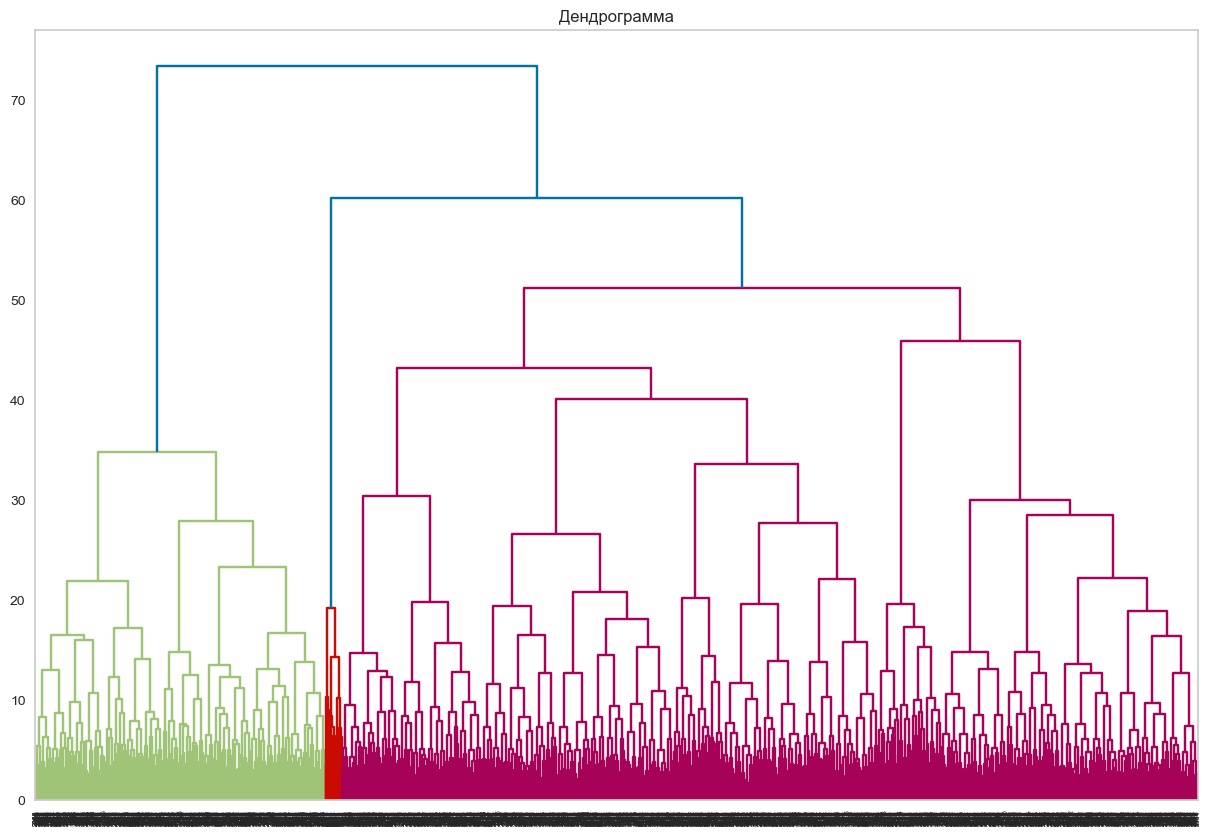

In [125]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# импорт классов модули кластеризации linkage() и dendrogram()
# стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') # таблица «связок» между объектами
# Визуализация дендрограммы
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.show()

Получаем количество кластеров равное 3. Выполним кластеризацию методом AgglomerativeClustering

In [126]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
# model.fit(X)
pred = model.fit_predict(X)
print(f'Коэффициент силуэта: {silhouette_score(X, pred):.4f}')

Коэффициент силуэта: 0.5138


Вычислим средние показатели и метрики качества для всех кластеров

In [127]:
df_with_clusters['Cluster'] = pred
cluster_stats = calculate_cluster_statistics(df_with_clusters)
print("СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ:")
display(cluster_stats)

metrics = calculate_hcv(y, pred)

СРЕДНИЕ ПОКАЗАТЕЛИ ПО КЛАСТЕРАМ:


,Avg_Age,Avg_Income,Avg_Tenure,Avg_Job_Level,Avg_Distance_Home,Avg_Training_Hours,Avg_Performance,Mode_Gender,Mode_Department,Mode_Marital_Status,Mode_Overtime,Attrition_Rate,Cluster_Size,Cluster_Size_Pct
Cluster,,,,,,,,,,,,,,
0,41.13,14271.51,19.99,2.19,10.12,104.47,2.90,1.0,0.0,1.0,0.0,0.04,601,19.7
1,41.22,7547.21,19.86,2.20,9.88,103.19,2.84,1.0,0.0,1.0,0.0,0.07,1429,46.9
2,41.54,4118.25,20.51,2.17,10.81,107.64,2.80,0.0,0.0,1.0,0.0,0.15,1018,33.4


1. Homogeneity Score: 0.0345
2. Completeness Score: 0.0101
3. V-measure Score: 0.0156


---
**Выводы**

Аггломеративная кластеризация показала значительно лучшие результаты по сравнению с методом K-Means. Этот вывод можно сделать на основании коэффициентов силуэта:

0.5138 >> 0.0785 

и внешних критериев оценки качества:

1. Homogeneity Score: 0.0345 > 0.0178
2. Completeness Score: 0.0101 > 0.0030
3. V-measure Score: 0.0156 > 0.0051

---
Вывод
---

В ходе выполнения лабораторной работы были изучены алгоритмы и методы кластеризации, получены навыки их практического применения.

В первой части использовался синтетический набор данных, который содержал три явно выраженных кластера по 50 элементов в каждом. В результате применения алгоритма K-means с 3 кластерами коэффициент силуэта составил 0.6904, что свидетельствует о высоком качестве кластеризации с четким разделением на группы.

Во второй части работы был проанализирован реальный набор данных, где кластерная структура изначально не была столь очевидной. Было использовано два метода: K-means и Agglomerative clustering. Также были использованы разные методы для определения оптимального количества кластров: метод локтя и дендрограмма. Два метода показали разное количество кластеров. Вариант с 3 кластерами и методом кластеризации AgglomerativeClustering показал наилучшие результаты. Коэффициент силуэта составил 0.5138, что во много больше аналогичного при использовании метода K-means (0.0785).

Помимо этого были рассчитаны средние значения для каждого кластера, для категориальных данных была рассчитана мода. Также были получены внешние метрики качества с помощью сравнения предсказанных значений с заведомо известными.

---
Дополнительные задания
---

Кластеризация без предварительной стандартизации данных и сравнение с результатами, полученными на стандартизированных данных 

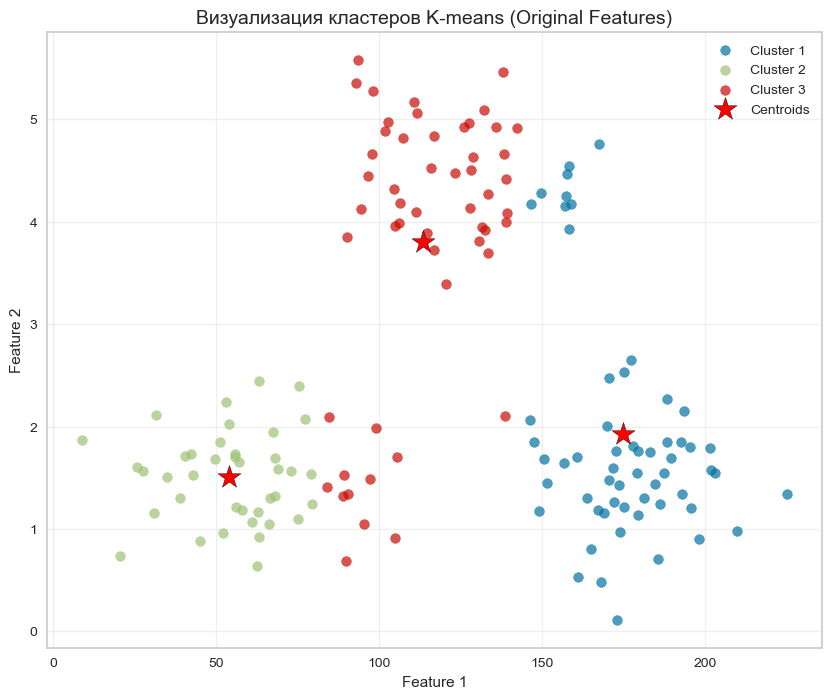

Коэффициент силуэта: 0.5966


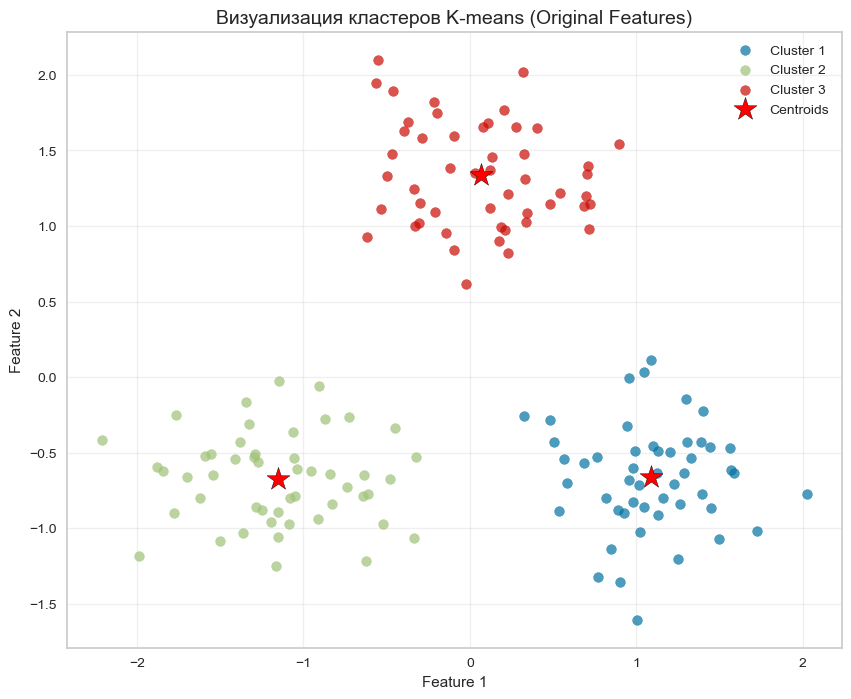

Коэффициент силуэта: 0.6904


array([1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1,
       2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0], dtype=int32)

In [128]:
df = make_data(50, 0)
df.reset_index(drop=True, inplace=True)

clusterization(df, 3)

df_scaled = scaler.fit_transform(df)
clusterization(df_scaled, 3)


Без стандартизации данных коэффициент силуэта заменто снижается, что говорит о пониженном качестве кластеризации. Помимо этого визуализация наглядно показывает некорректность определения данных в кластеры: нет чётких "границ", как в случае с предобработанными данными.

# Задание 6

Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до
10). Построить график - по оси х - кол-во кластеров, по у - значение метрики
(отразить все 4 метрики на одном графике разным цветом).

<Axes: xlabel='n_clusters'>

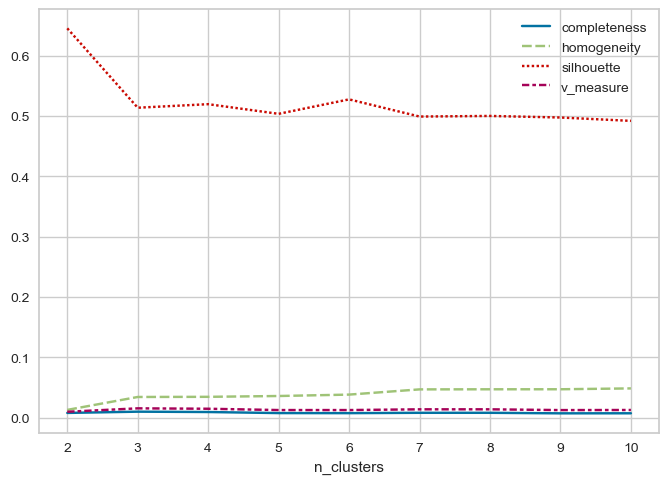

In [129]:
df = pd.DataFrame()

df['n_clusters'] = [x for x in range(2, 11)]

silhouettes = []
homogeneities = []
completenesses = []
v_measures = []

for n_clusters in range(2, 11):
	ac = AgglomerativeClustering(n_clusters)
	pred = ac.fit_predict(X)
	silhouettes.append(silhouette_score(X, pred))	
	metrics = calculate_hcv_no_print(y, pred)
	homogeneities.append(metrics['Homogeneity'])
	completenesses.append(metrics['Completeness'])
	v_measures.append(metrics['V-measure'])

df['silhouette'] = silhouettes
df['homogeneity'] = homogeneities
df['completeness'] = completenesses
df['v_measure'] = v_measures
data = df.pivot_table(index='n_clusters')
sns.lineplot(data)

С повышением количества кластеров можно наблюдать снижение коэффициента силуэта. Наибольший - при числе кластеров 2.

Также заметим рост метрики Homogeneity в ростом числа кластеров.

Другие две метрики (Completeness и V-Measure) заметно не изменяются.

# Задание 7

Выполнить нормализацию данных с помощью MinMaxScaler, MaxAbsScaler и сравнить
полученные итоговые метрики с теми, что были получены на данных,
нормализованных с помощью StandardScaler.

In [138]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score
import pandas as pd

# Функция для расчета всех метрик
def calculate_metrics(X, true_labels, n_clusters=2):
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = ac.fit_predict(X)
    
    silhouette = silhouette_score(X, clusters)
    h = homogeneity_score(true_labels, clusters)
    c = completeness_score(true_labels, clusters)
    v = v_measure_score(true_labels, clusters)
    
    return silhouette, h, c, v

# Сравниваем скейлеры
results = []

# StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
silhouette, h, c, v = calculate_metrics(df_scaled, y)
results.append(['StandardScaler', silhouette, h, c, v])

# MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
silhouette, h, c, v = calculate_metrics(df_scaled, y)
results.append(['MinMaxScaler', silhouette, h, c, v])

# MaxAbsScaler
scaler = MaxAbsScaler()
df_scaled = scaler.fit_transform(df)
silhouette, h, c, v = calculate_metrics(df_scaled, y)
results.append(['MaxAbsScaler', silhouette, h, c, v])

# Таблица результатов
df_results = pd.DataFrame(results, columns=['Метод', 'Silhouette', 'Homogeneity', 'Completeness', 'V-measure'])
print(df_results.to_string(index=False))

# Лучший метод по V-measure
best = df_results.loc[df_results['V-measure'].idxmax()]
print(f"\nЛучший метод по V-measure: {best['Метод']} ({best['V-measure']:.4f})")

# Лучший метод по Silhouette
best_sil = df_results.loc[df_results['Silhouette'].idxmax()]
print(f"Лучший метод по Silhouette: {best_sil['Метод']} ({best_sil['Silhouette']:.4f})")

         Метод  Silhouette  Homogeneity  Completeness  V-measure
StandardScaler    0.099447     0.013178      0.007155   0.009275
  MinMaxScaler    0.220651     0.013355      0.006900   0.009099
  MaxAbsScaler    0.241277     0.013355      0.006900   0.009099

Лучший метод по V-measure: StandardScaler (0.0093)
Лучший метод по Silhouette: MaxAbsScaler (0.2413)


**MaxAbsScaler** дает лучшую внутреннюю согласованность кластеров (Silhouette = 0.241)

**StandardScaler** незначительно лучше по соответствию истинным классам (V-measure = 0.0093)